https://bluesharehub.com/python-naver-image-crawling/

코드 참고했습니다

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install chromedriver-autoinstaller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 30.2 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugi

In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import requests
import os
import time
import chromedriver_autoinstaller

In [7]:
chrome_path =  "/content/drive/MyDrive/Boaz/musinsa/chromedriver"

In [8]:
sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off : cloab은 새창을 지원하지않기 때문에 창 없는 모드
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [9]:
url = "https://www.naver.com/"  # set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [10]:
# driver 작동 테스트
driver.get(url)
driver.implicitly_wait(3) # element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정
# driver.get_screenshot_as_file('google_screen.png')
driver.close()

print(driver)

<selenium.webdriver.chrome.webdriver.WebDriver (session="3e7f83c569adcf16f8be09555773cd8a")>


In [13]:
# 변수 설정
search = input('검색 키워드를 입력 : ')
fileName = input('파일 네임 설정 : ')
number = 10000

# 이미지 저장 경로 설정
image_save_path = f"/content/drive/MyDrive/Boaz/미니플젝2/face/{fileName}"
if not os.path.exists(image_save_path):
    os.makedirs(image_save_path)

# 크롬 드라이버 설정
driver = webdriver.Chrome(options=chrome_options)

def save_large_image(image_index, fileName):
    # 큰 이미지 URL 추출
    large_image_selector = "body > div.ly_viewer._fe_image_viewer_root.viewer_open > div > div > div.viewer_wrap._fe_image_viewer_wrap > div.viewer_image._fe_image_viewer_main_image_wrap > div.image > img"
    large_image_element = driver.find_element(By.CSS_SELECTOR, large_image_selector)
    large_image_url = large_image_element.get_attribute("src")

    # 이미지 다운로드 및 저장
    image_data = requests.get(large_image_url).content
    image_filename = os.path.join(image_save_path, f"{fileName}_{image_index}.jpg")
    with open(image_filename, 'wb') as file:
        file.write(image_data)
    print(f"Image {image_index} saved to {image_filename}")

try:
    # 네이버 이미지 검색 페이지로 이동
    driver.get(f"https://search.naver.com/search.naver?ssc=tab.image.all&where=image&sm=tab_jum&query={search}")

    # 페이지가 완전히 로드될 때까지 잠시 대기
    time.sleep(3)

    # 첫 번째 이미지를 클릭
    first_image_selector = "#main_pack > section > div.api_subject_bx._fe_image_tab_grid_root.ani_fadein > div > div > div.image_tile._fe_image_tab_grid > div:nth-child(1) > div > div > div > img"
    first_image_element = driver.find_element(By.CSS_SELECTOR, first_image_selector)
    first_image_element.click()

    # 잠시 대기 (이미지가 로드되는 시간 고려)
    time.sleep(3)

    # 첫 번째 이미지 저장
    save_large_image(1, fileName)

    for i in range(2, number + 1):
        # JavaScript를 사용하여 다음 버튼 클릭
        next_button_selector = "body > div.ly_viewer._fe_image_viewer_root.viewer_open > div > div > div.viewer_wrap._fe_image_viewer_wrap > div.viewer_header._fe_image_viewer_header > a.btn_move.btn_next._fe_image_viewer_next_button"
        next_button_element = driver.find_element(By.CSS_SELECTOR, next_button_selector)
        driver.execute_script("arguments[0].click();", next_button_element)

        # 잠시 대기 (다음 이미지가 로드되는 시간 고려)
        time.sleep(3)

        # 이미지 저장
        save_large_image(i, fileName)

finally:
    # 드라이버 종료
    driver.quit()

검색 키워드를 입력 : 봄웜톤 연예인
파일 네임 설정 : spring
Image 1 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_1.jpg
Image 2 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_2.jpg
Image 3 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_3.jpg
Image 4 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_4.jpg
Image 5 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_5.jpg
Image 6 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_6.jpg
Image 7 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_7.jpg
Image 8 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_8.jpg
Image 9 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_9.jpg
Image 10 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_10.jpg
Image 11 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_11.jpg
Image 12 saved to /content/drive/MyDrive/Boaz/미니플젝2/face/spring/spring_12.jpg
Image 13 saved to /content/drive/MyDrive/Bo

KeyboardInterrupt: 

486번째 이미지 이후로는 계속 같은 이미지만 저장되는 것을 확인했습니다

네이버에서 이미지 검색 시 스크롤이 여기까지만 되는 것 같습니다
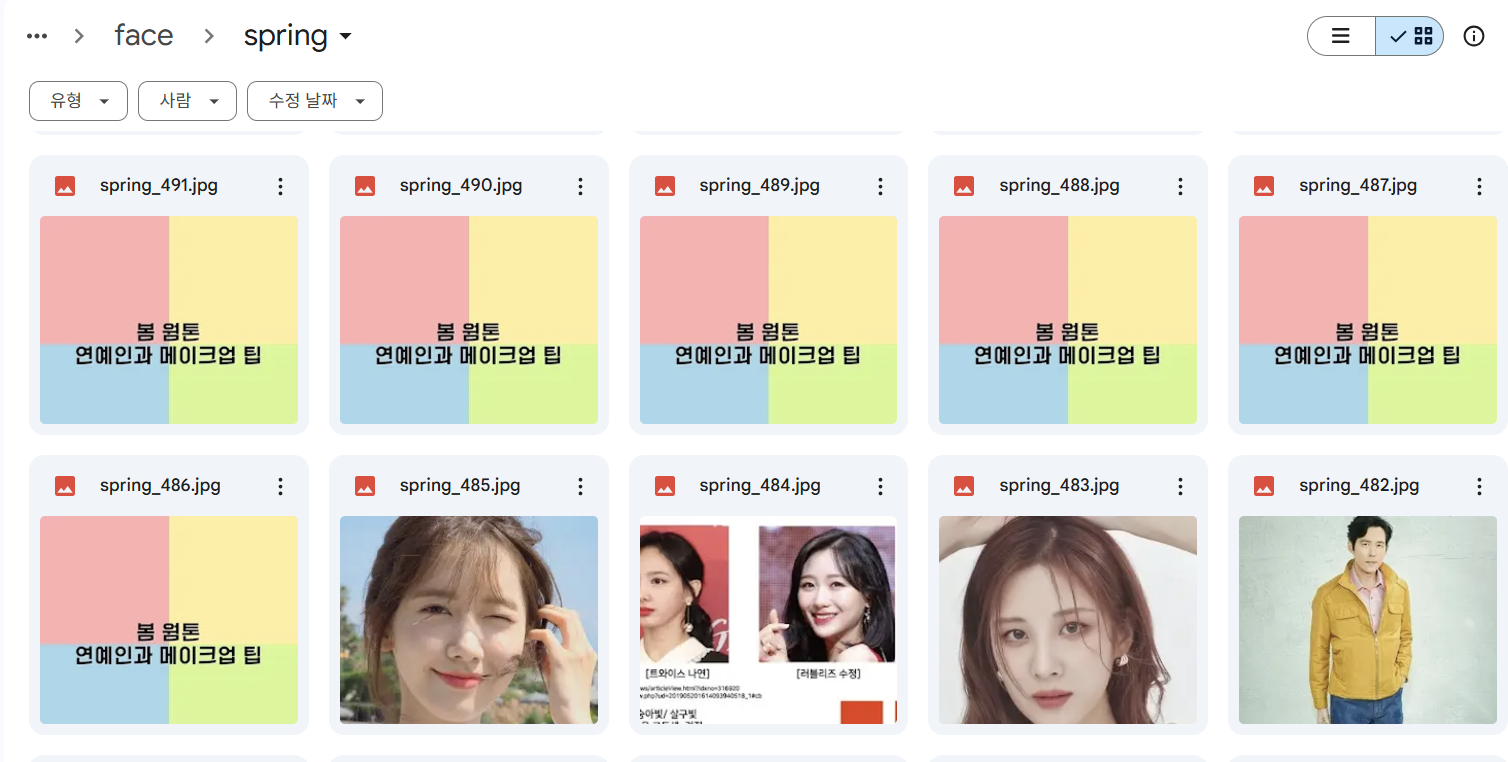